<a href="https://colab.research.google.com/github/ChandrashekharRobbi/Speech-Emotion-Detection/blob/main/Speech_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary LIbraries

In [32]:
import pandas as pd
from google.colab import files
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [20]:
!pip install -q kaggle
files.upload()          # expire any previous token(s) and upload recreated token
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
!unzip -q toronto-emotional-speech-set-tess.zip

replace TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [34]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_wash_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_turn_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_rot_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_said_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_fall_disgust.wav']

In [35]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [36]:
len(paths)

2800

## Crete a DataFrame

In [37]:
df = pd.DataFrame()
df["voice"] = paths
df["label"] = labels 

In [38]:
df.head()

,voice,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust


In [39]:
df.tail()

,voice,label
2795,/content/TESS Toronto emotional speech set dat...,ps
2796,/content/TESS Toronto emotional speech set dat...,ps
2797,/content/TESS Toronto emotional speech set dat...,ps
2798,/content/TESS Toronto emotional speech set dat...,ps
2799,/content/TESS Toronto emotional speech set dat...,ps


In [40]:
df["label"].unique()

array(['disgust', 'happy', 'sad', 'angry', 'fear', 'ps', 'neutral'],
      dtype=object)

In [41]:
df["label"].value_counts()

disgust    400
happy      400
sad        400
angry      400
fear       400
ps         400
neutral    400
Name: label, dtype: int64

## Visualize the waves of voice

In [42]:
# create a function for waveshow
def waveshow(data, sr, emotion):
  plt.figure(figsize=(8,8))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)

### For `fear`

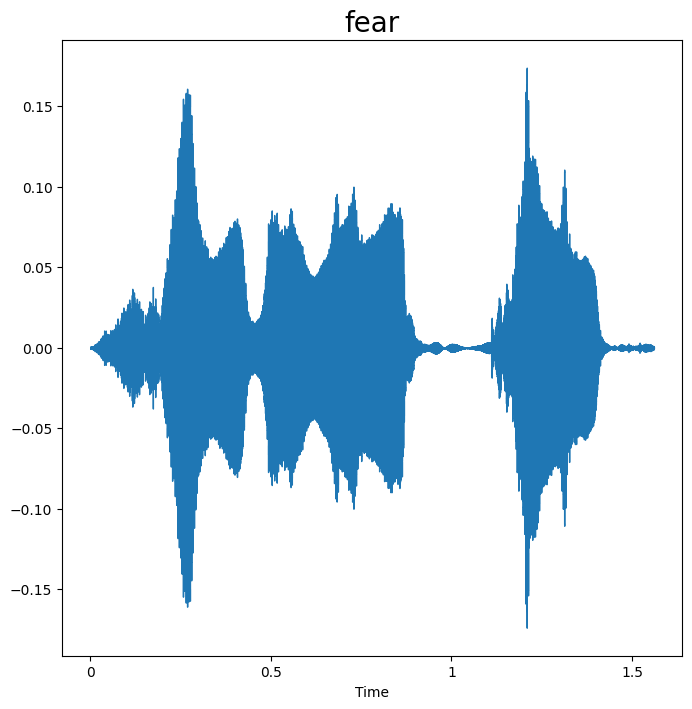

In [59]:
emotion = 'fear'
path = df[df["label"] == 'fear']["voice"].iloc[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)

In [60]:
# Let's hear `fear` emotion
Audio(path)